In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('telecom_users.csv', sep=',')
df.head()
print(df.shape)
df.head()

(5986, 22)


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [5]:
df=df.drop(['Unnamed: 0', 'customerID'],axis=1)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [7]:
agrupado_internetservice=df.groupby(['InternetService']).size()
agrupado_internetservice

InternetService
DSL            2068
Fiber optic    2627
No             1291
dtype: int64

C:\Users\temp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Types')

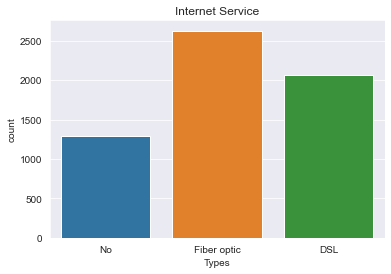

In [8]:
sns.set_style('darkgrid')
sns.countplot(df.InternetService)
plt.title('Internet Service')
plt.xlabel('Types')

C:\Users\temp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Partner')

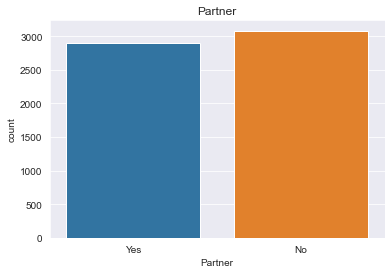

In [9]:
sns.countplot(df.Partner)
plt.title('Partner')

C:\Users\temp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Partner')

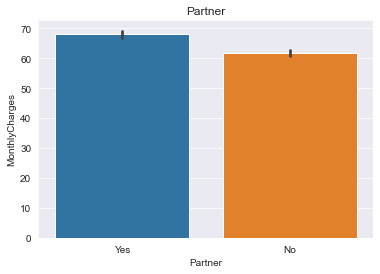

In [10]:
sns.barplot(df.Partner, df.MonthlyCharges)
plt.title('Partner')

C:\Users\temp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Churn')

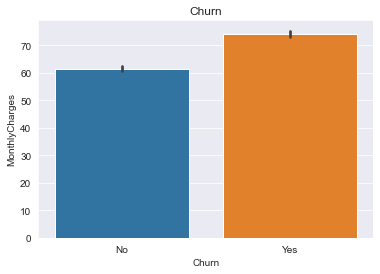

In [11]:
sns.barplot(df.Churn, df.MonthlyCharges)
plt.title('Churn')

C:\Users\temp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Internet Service')

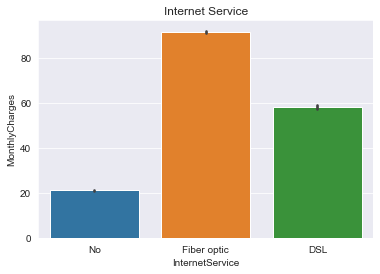

In [12]:
sns.barplot(df.InternetService, df.MonthlyCharges)
plt.title('Internet Service')

C:\Users\temp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Senior Citizen')

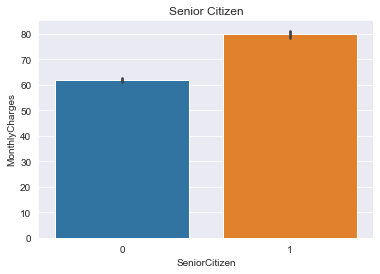

In [13]:
sns.barplot(df.SeniorCitizen, df.MonthlyCharges)
plt.title('Senior Citizen')

C:\Users\temp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Contract')

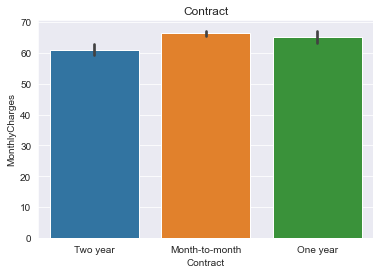

In [14]:
sns.barplot(df.Contract, df.MonthlyCharges)
plt.title('Contract')

In [15]:
df=df.replace('Yes', 1)
df=df.replace('No',0)
df=df.replace('No internet service', 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,1,1,72,1,1,0,0,0,0,0,0,0,Two year,0,Credit card (automatic),24.10,1734.65,0
1,Female,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,Female,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,Male,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,0
4,Male,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,0


In [16]:
df['InternetService']=df['InternetService'].replace('DSL',1)
df['InternetService']=df['InternetService'].replace('Fiber optic',2)
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,1,1,72,1,1,0,0,0,0,0,0,0,Two year,0,Credit card (automatic),24.10,1734.65,0
1,Female,0,0,0,44,1,0,2,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,Female,1,1,0,38,1,1,2,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,Male,0,0,0,4,1,0,1,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,0
4,Male,0,0,0,2,1,0,1,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,0
5,Female,0,1,0,70,0,No phone service,1,1,0,1,1,0,1,Two year,1,Bank transfer (automatic),49.85,3370.2,0
6,Female,0,0,0,33,1,1,2,1,0,0,0,0,1,Month-to-month,1,Electronic check,90.65,2989.6,0
7,Female,0,0,0,1,0,No phone service,1,0,0,0,0,0,0,Month-to-month,1,Mailed check,24.90,24.9,0
8,Male,0,0,0,39,0,No phone service,1,0,0,1,1,0,0,One year,0,Mailed check,35.55,1309.15,0
9,Male,1,0,0,55,1,1,2,1,1,1,1,1,1,Month-to-month,1,Electronic check,116.50,6382.55,0


In [17]:
df['Contract']=df['Contract'].replace('Two year',24)
df['Contract']=df['Contract'].replace('Month-to-month',1)
df['Contract']=df['Contract'].replace('One year',12)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,1,1,72,1,1,0,0,0,0,0,0,0,24,0,Credit card (automatic),24.10,1734.65,0
1,Female,0,0,0,44,1,0,2,0,1,1,0,1,0,1,1,Credit card (automatic),88.15,3973.2,0
2,Female,1,1,0,38,1,1,2,0,0,0,0,0,0,1,1,Bank transfer (automatic),74.95,2869.85,1
3,Male,0,0,0,4,1,0,1,0,0,0,0,0,1,1,1,Electronic check,55.90,238.5,0
4,Male,0,0,0,2,1,0,1,1,0,1,0,0,0,1,0,Electronic check,53.45,119.5,0


In [18]:
df['gender']=df['gender'].replace('Male',1)
df['gender']=df['gender'].replace('Female',0)

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,0,0,0,0,0,0,24,0,Credit card (automatic),24.10,1734.65,0
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,1,1,Credit card (automatic),88.15,3973.2,0
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,1,1,Bank transfer (automatic),74.95,2869.85,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,1,1,Electronic check,55.90,238.5,0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,1,0,Electronic check,53.45,119.5,0


In [20]:
df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check', 1)
df['PaymentMethod'] = df['PaymentMethod'].replace('Mailed check', 2)
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 3)
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 4)

df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   int64  
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   int64  
 3   Dependents        5986 non-null   int64  
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   int64  
 6   MultipleLines     5986 non-null   int64  
 7   InternetService   5986 non-null   int64  
 8   OnlineSecurity    5986 non-null   int64  
 9   OnlineBackup      5986 non-null   int64  
 10  DeviceProtection  5986 non-null   int64  
 11  TechSupport       5986 non-null   int64  
 12  StreamingTV       5986 non-null   int64  
 13  StreamingMovies   5986 non-null   int64  
 14  Contract          5986 non-null   int64  
 15  PaperlessBilling  5986 non-null   int64  
 16  PaymentMethod     5986 non-null   int64  


In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,0,0,0,0,0,0,24,0,4,24.10,1734.65,0
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,1,1,4,88.15,3973.2,0
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,1,1,3,74.95,2869.85,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,1,1,1,55.90,238.5,0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,1,0,1,53.45,119.5,0


In [23]:
df['MonthlyCharges']=df['MonthlyCharges'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            5986 non-null   int64 
 1   SeniorCitizen     5986 non-null   int64 
 2   Partner           5986 non-null   int64 
 3   Dependents        5986 non-null   int64 
 4   tenure            5986 non-null   int64 
 5   PhoneService      5986 non-null   int64 
 6   MultipleLines     5986 non-null   int64 
 7   InternetService   5986 non-null   int64 
 8   OnlineSecurity    5986 non-null   int64 
 9   OnlineBackup      5986 non-null   int64 
 10  DeviceProtection  5986 non-null   int64 
 11  TechSupport       5986 non-null   int64 
 12  StreamingTV       5986 non-null   int64 
 13  StreamingMovies   5986 non-null   int64 
 14  Contract          5986 non-null   int64 
 15  PaperlessBilling  5986 non-null   int64 
 16  PaymentMethod     5986 non-null   int64 
 17  MonthlyCharges

In [25]:
df['TotalCharges'] = df['TotalCharges'].astype(str)

In [26]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)
total_charge = df['TotalCharges']

In [27]:
for i in range(0, len(df)-1):
    total_charge[i] = int(total_charge[i])
df['TotalCharges'] = df['TotalCharges'].astype(int)

<ipython-input-27-439e908c9b46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_charge[i] = int(total_charge[i])


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            5986 non-null   int64
 1   SeniorCitizen     5986 non-null   int64
 2   Partner           5986 non-null   int64
 3   Dependents        5986 non-null   int64
 4   tenure            5986 non-null   int64
 5   PhoneService      5986 non-null   int64
 6   MultipleLines     5986 non-null   int64
 7   InternetService   5986 non-null   int64
 8   OnlineSecurity    5986 non-null   int64
 9   OnlineBackup      5986 non-null   int64
 10  DeviceProtection  5986 non-null   int64
 11  TechSupport       5986 non-null   int64
 12  StreamingTV       5986 non-null   int64
 13  StreamingMovies   5986 non-null   int64
 14  Contract          5986 non-null   int64
 15  PaperlessBilling  5986 non-null   int64
 16  PaymentMethod     5986 non-null   int64
 17  MonthlyCharges    5986 non-null  

In [29]:
corr = df.corr()

<AxesSubplot:>

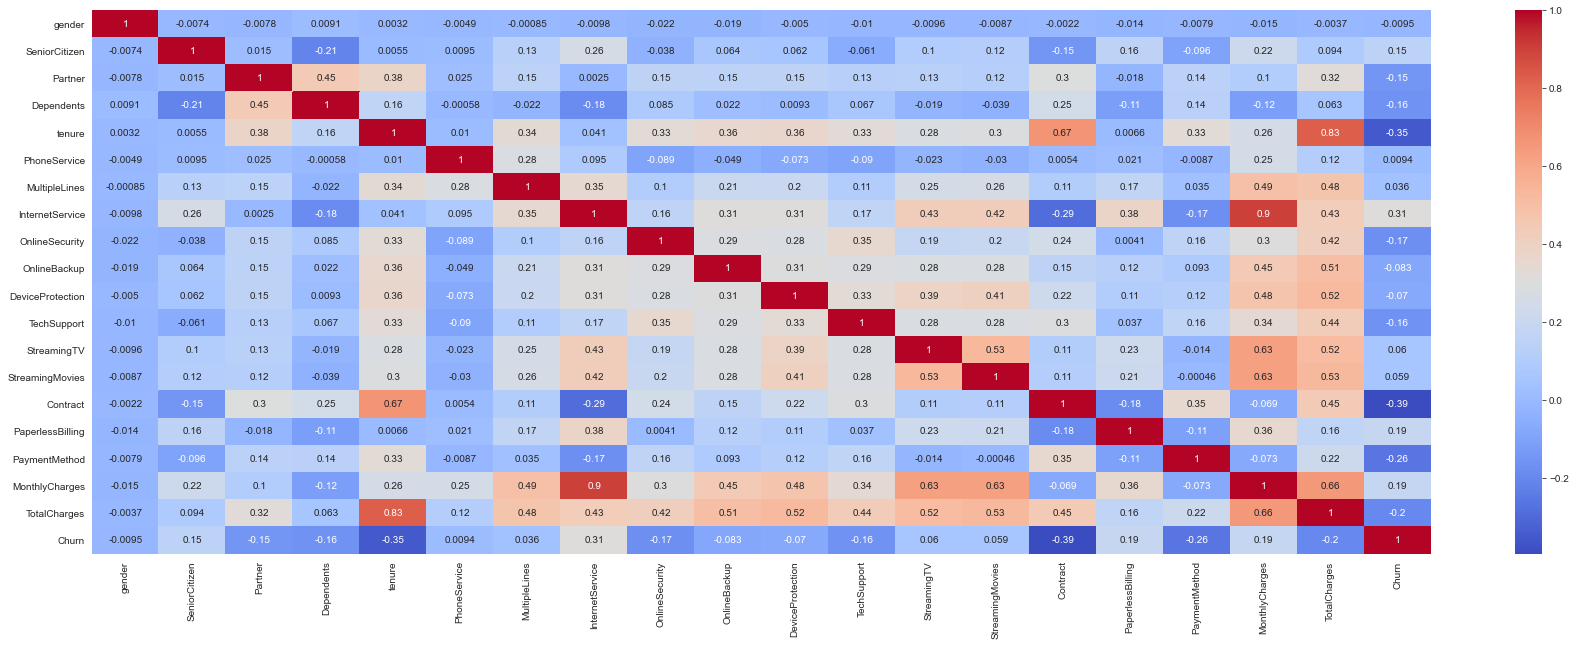

In [30]:
plt.figure(figsize=[30,10])
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [31]:
corr[abs(corr['Churn'])>0.1].index

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
df=df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,72,0,0,0,24,0,4,24,1734,0
1,0,0,0,44,2,0,0,1,1,4,88,3973,0
2,1,1,0,38,2,0,0,1,1,3,74,2869,1
3,0,0,0,4,1,0,0,1,1,1,55,238,0
4,0,0,0,2,1,1,0,1,0,1,53,119,0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [34]:
x=df.drop(['Churn'], axis=1)
y=df['Churn']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, 
                                                    random_state=101)

In [37]:
##Logistic Regression

lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [38]:
lr_pred=lr.predict(x_test)

In [39]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1304
           1       0.66      0.53      0.59       492

    accuracy                           0.80      1796
   macro avg       0.75      0.71      0.73      1796
weighted avg       0.79      0.80      0.79      1796



In [40]:
print(confusion_matrix(y_test, lr_pred))

[[1171  133]
 [ 232  260]]


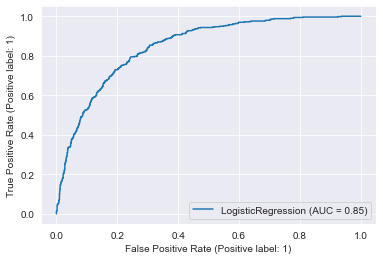

In [41]:
metrics.plot_roc_curve(lr, x_test, y_test)

In [42]:


from sklearn.preprocessing import StandardScaler

In [43]:
##KNN Classifier

scaler=StandardScaler()

In [44]:
scaler.fit(df.drop('Churn', axis=1))

StandardScaler()

In [45]:
df_normalizado=scaler.transform(df.drop('Churn', axis=1))

In [46]:
df_param=pd.DataFrame(df_normalizado, columns=df.columns[:-1])

In [47]:
df_param.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.438669,1.030192,1.530447,1.612576,-1.572960,-0.633158,-0.638858,1.584676,-1.198046,1.461837,-1.339426,-0.246155
1,-0.438669,-0.970693,-0.653404,0.470387,0.998944,-0.633158,-0.638858,-0.826124,0.834693,1.461837,0.785841,0.738466
2,2.279624,1.030192,-0.653404,0.225633,0.998944,-0.633158,-0.638858,-0.826124,0.834693,0.592346,0.320939,0.252972
3,-0.438669,-0.970693,-0.653404,-1.161310,-0.287008,-0.633158,-0.638858,-0.826124,0.834693,-1.146636,-0.310000,-0.904035
4,-0.438669,-0.970693,-0.653404,-1.242895,-0.287008,1.579384,-0.638858,-0.826124,-1.198046,-1.146636,-0.376414,-0.956366


In [48]:
x_train, x_test, y_train, y_test = train_test_split(
    df_param, df['Churn'], test_size=0.3, random_state=101)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
knn_pred=knn.predict(x_test)

In [52]:
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1304
           1       0.52      0.50      0.51       492

    accuracy                           0.74      1796
   macro avg       0.67      0.66      0.66      1796
weighted avg       0.73      0.74      0.73      1796

[[1077  227]
 [ 247  245]]


In [53]:
error_rate= []

for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))

Text(0, 0.5, 'Error Rate')

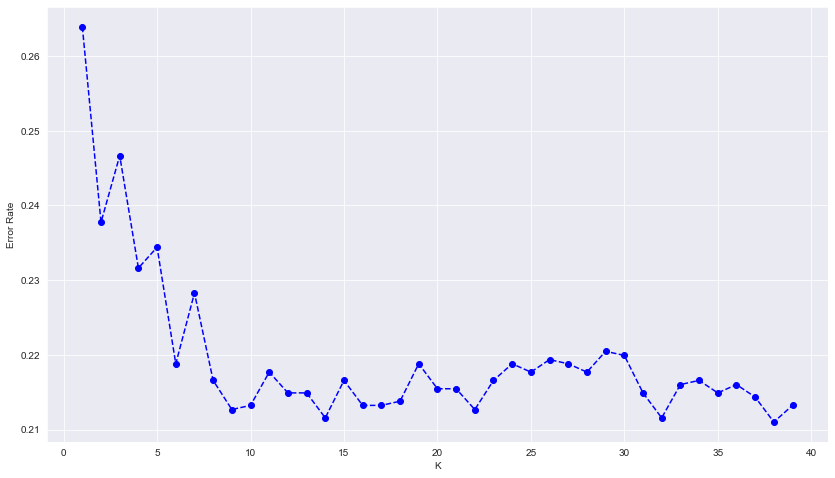

In [54]:
sns.set_style('darkgrid')
plt.figure(figsize=[14,8])
plt.plot(range(1,40), error_rate, color='blue',
        linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
    knn= KNeighborsClassifier(n_neighbors=9)
    knn.fit(x_train, y_train)
    knn_pred=knn.predict(x_test)

In [56]:
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1304
           1       0.64      0.51      0.57       492

    accuracy                           0.79      1796
   macro avg       0.73      0.70      0.71      1796
weighted avg       0.78      0.79      0.78      1796

[[1162  142]
 [ 240  252]]


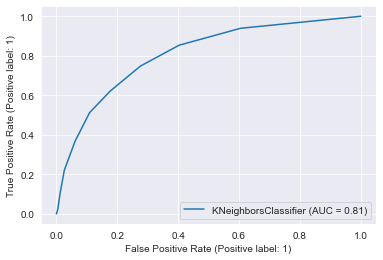

In [57]:
metrics.plot_roc_curve(knn, x_test, y_test)

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
## Decision Tree Classifier
x=df.drop(['Churn'], axis=1)
y=df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, 
                                                    random_state=101)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1304
           1       0.65      0.49      0.56       492

    accuracy                           0.79      1796
   macro avg       0.73      0.69      0.71      1796
weighted avg       0.78      0.79      0.78      1796



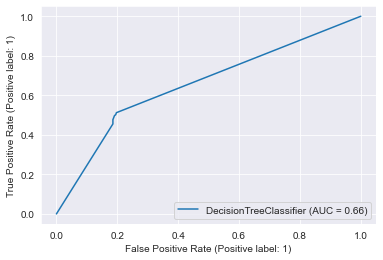

In [60]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree_pred=dtree.predict(x_test)
print(classification_report(y_test,pred))
metrics.plot_roc_curve(dtree, x_test, y_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1304
           1       0.62      0.47      0.54       492

    accuracy                           0.78      1796
   macro avg       0.72      0.68      0.69      1796
weighted avg       0.76      0.78      0.77      1796



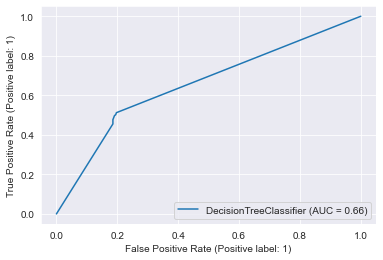

In [62]:
## Random Forest
rfc=RandomForestClassifier(n_estimators=600)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(classification_report(y_test, rfc_pred))
metrics.plot_roc_curve(dtree, x_test, y_test)


In [63]:
from sklearn.svm import SVC

C:\Users\temp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\temp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\temp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1304
           1       0.00      0.00      0.00       492

    accuracy                           0.73      1796
   macro avg       0.36      0.50      0.42      1796
weighted avg       0.53      0.73      0.61      1796



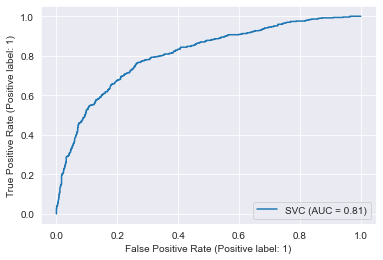

In [64]:
# Support Vector Machines
svm=SVC()
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print(classification_report(y_test,svm_pred))
metrics.plot_roc_curve(svm, x_test, y_test)

In [65]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid= GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [68]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.8s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.2s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.9s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.1s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   3.2s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   3.3s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   3.1s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   3.1s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   3.1s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   2.8s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   4.9s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   6.3s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   5.1s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   4.7s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   4.7s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.6s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.5s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.9s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.7s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   4.4s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   5.2s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   5.9s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [69]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [70]:
forecast=grid.predict(x_test)
print(classification_report(y_test, forecast))

print(confusion_matrix(y_test, forecast))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1304
           1       0.66      0.37      0.47       492

    accuracy                           0.78      1796
   macro avg       0.73      0.65      0.66      1796
weighted avg       0.76      0.78      0.75      1796

[[1213   91]
 [ 312  180]]
